<a href="https://colab.research.google.com/github/Jruiz1980/CSE450-Modules/blob/main/J_Ruiz_Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.11 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [ ]:
import pandas as pd

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [ ]:
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (16000, 19)
Shape of X_test: (4000, 19)
Shape of y_train: (16000,)
Shape of y_test: (4000,)


In [ ]:
import xgboost as xgb

# Initialize the XGBoost Regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("XGBoost model trained successfully!")

XGBoost model trained successfully!


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np # Import numpy for sqrt
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb) # Calculate RMSE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb) # Calculate MAE

print(f"XGBoost Regressor - Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost Regressor - Root Mean Squared Error: {rmse_xgb:.2f}")
print(f"XGBoost Regressor - Mean Absolute Error: {mae_xgb:.2f}")
print(f"XGBoost Regressor - R-squared: {r2_xgb:.2f}")

XGBoost Regressor - Mean Squared Error: 19190797098.90
XGBoost Regressor - Root Mean Squared Error: 138530.85
XGBoost Regressor - Mean Absolute Error: 69351.39
XGBoost Regressor - R-squared: 0.87


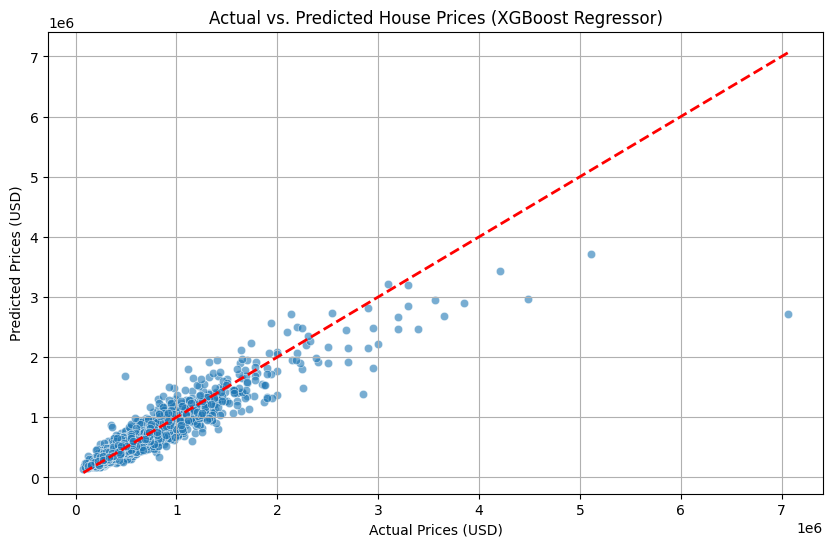

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Diagonal line for perfect prediction
plt.title('Actual vs. Predicted House Prices (XGBoost Regressor)')
plt.xlabel('Actual Prices (USD)')
plt.ylabel('Predicted Prices (USD)')
plt.grid(True)
plt.show()